# Multivariate Analysis for Planetary Atmospheres

This notebooks relies on the pickle dataframe in the `notebooks/` folder. You can also compute your own using `3_ColorColorFigs.ipynb`

In [1]:
#COLOR COLOR PACKAGE
from colorcolor import compute_colors as c
from colorcolor import stats

import matplotlib.pyplot as plt
import pandas as pd
import pickle as pk
import numpy as np
from itertools import combinations as comb
import seaborn as sns
%matplotlib inline

This dataframe contains: 
- **independent variables** : filter observations 
- **dependent variables** : physical planet parameters 

In [2]:
data= pk.load(open('wfirst_colors_dataframe.pk','rb'))
data=data.dropna()[~data.dropna().isin([np.inf, -np.inf])].dropna() #drop infinities and nans

In [3]:
#let's specicy our y of interest for this tutorial, feel free to play around with this
yofinterest = 'metallicity'
#lets also specify a filter set. Let's just focus on WFIRST filters 
filters = c.print_filters('wfirst')

In [4]:
#lets also specify a filter set. Let's just focus on WFIRST filters 
filters = c.print_filters('wfirst')
#and also define the combinations: e.g. Filter1 - Filter2
filter_combinations = [i[0]+i[1] for i in comb(filters,2)] +filters

### Explore Correlation Matrix: Fig 6 Batalha+2018

In figure 6 we looked at the difference between the correlation matrix with and without the cloud sample

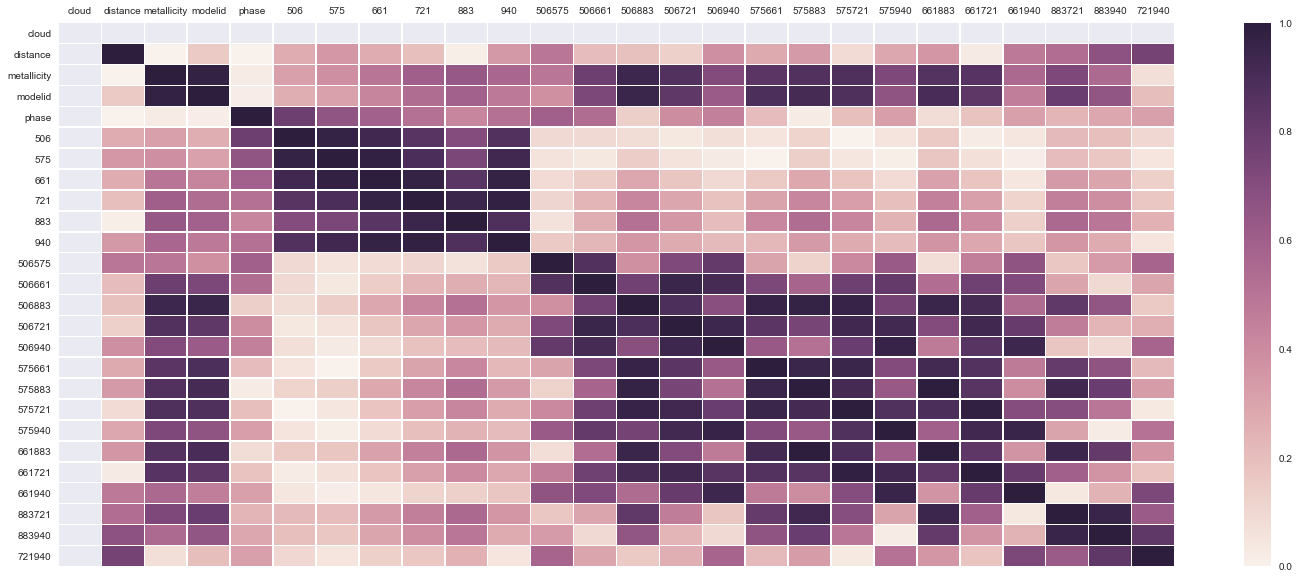

In [5]:
#lets look at only the cloud free sample
corr_matrix = data.loc[(data['cloud']==0)].corr()
fig, ax = plt.subplots(figsize=(25,10)) 
#here I am simplifying the image by adding in an absolute value 
#you can remove it if you are interested in seeing what is positive and nagatively correlated
sns.heatmap(abs(corr_matrix), vmax=1, square=False, linewidths=.5, ax=ax).xaxis.tick_top()

Figure 6 in Batalha 2018 is a subset of this larger block

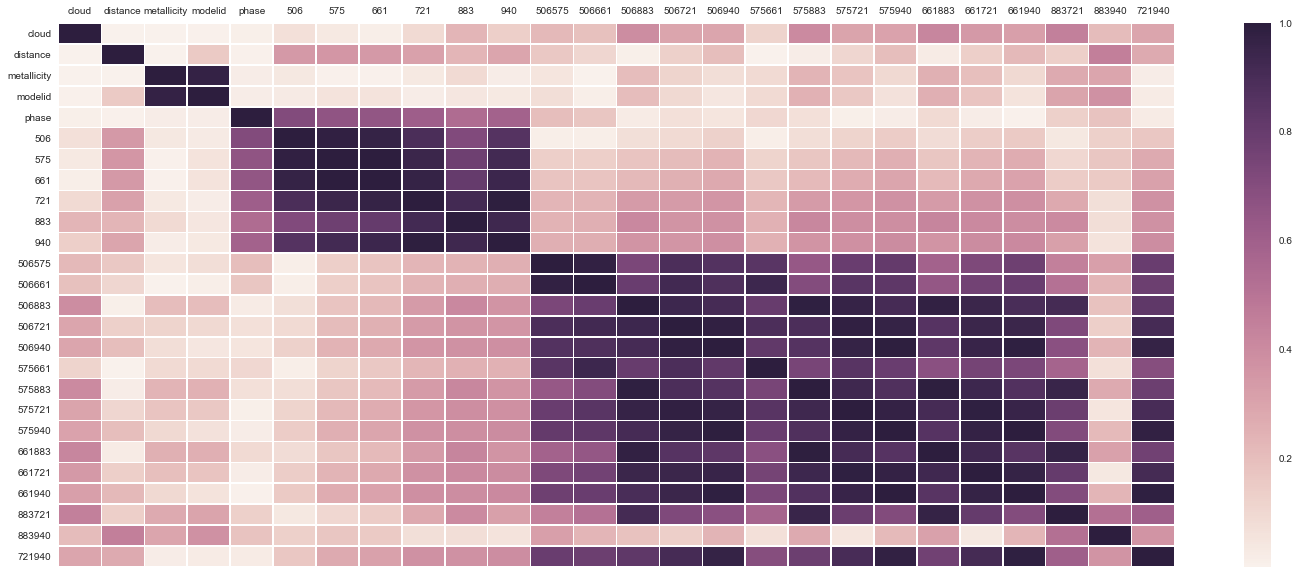

In [6]:
#lets look at everything
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(25,10)) 
#here I am simplifying the image by adding in an absolute value 
#you can remove it if you are interested in seeing what is positive and nagatively correlated
sns.heatmap(abs(corr_matrix), vmax=1, square=False, linewidths=.5, ax=ax).xaxis.tick_top()

** See immediately how there are less strongly correlated values for physical parameters versus filters??**

## Try Linear Discriminant Analysis For Classification

In [7]:
#try cloud free first
subset = data.loc[(data['cloud']==0) & (data['phase']==90)]

#separate independent
X = subset.loc[:,filter_combinations]

#and dependent variables (also this make it a string so we can turn it into a label)
y =  subset[yofinterest].astype(str)

/Users/natashabatalha/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/natashabatalha/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/natashabatalha/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:510: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


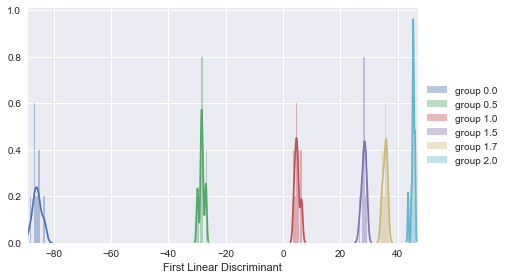

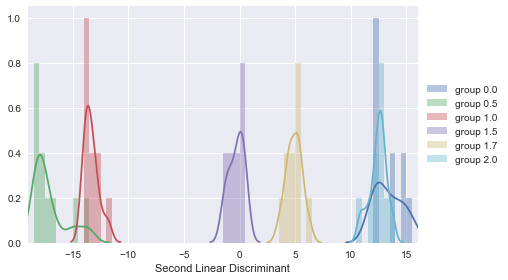

In [8]:
lda_values=stats.lda_analysis(X,y)

These warnings are coming up because we have used both absolute and relative filters. Because LDA, like regression techniques involves computing a matrix inversion, which is inaccurate if the determinant is close to 0 (i.e. two or more variables are almost a linear combination of each other). This means that our relative filter and absolute combinations are nearly a linear combination of each other (which makes sense). For classification purposes this is okay for now. 

/Users/natashabatalha/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/natashabatalha/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:510: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


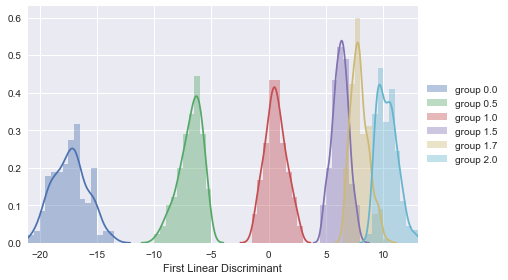

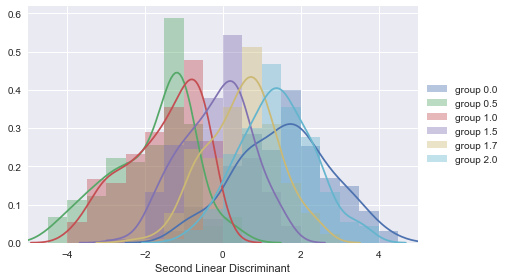

In [11]:
#Now lets unconstrain the phase
subset = data.loc[(data['cloud']==0)]

#separate independent
X = subset.loc[:,filter_combinations]

#and dependent variables (also this make it a string so we can turn it into a label)
y =  subset[yofinterest].astype(str)

lda_values=stats.lda_analysis(X,y)

/Users/natashabatalha/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


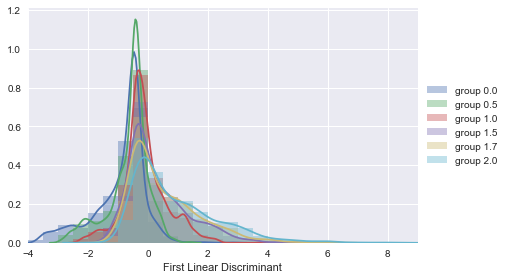

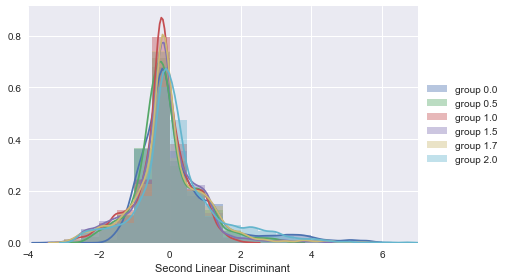

In [12]:
#Now lets unconstrain everything
subset = data

#separate independent
X = subset.loc[:,filter_combinations]

#and dependent variables (also this make it a string so we can turn it into a label)
y =  subset[yofinterest].astype(str)

lda_values=stats.lda_analysis(X,y)